In [3]:
# Import modules

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import signal
import matplotlib.pyplot as plt
import PyOMA as oma

# ======== PRE-PROCESSING =====================================================
# To open a .txt file create a variable containing the path to the file
# _file = "./test.txt" # Path to the txt file

# # open the file with pandas and create a dataframe
# # N.B. whatchout for header, separator and remove time column if present
# data = pd.read_csv(_file, header=0, sep="\t", index_col=False) 
# data = data.to_numpy()

# to retrieve the example data 
data, (fex, FI_ex, xi_ex) = oma.Exdata()

In [4]:
# Sampling frequency
fs = 100 # [Hz] Sampling Frequency

# Using SciPy's signal module we can pre-process our data e.g. performing
# decimation, trend removal and filtering. 
# Detrend and decimate
data = signal.detrend(data, axis=0) # Trend rmoval
q = 5 # Decimation factor
data = signal.decimate(data,  q, ftype='fir', axis=0) # Decimation
fs = fs/q # [Hz] Decimated sampling frequency

# Filter
_b, _a = signal.butter(12, (0.3,6.5), fs=fs, btype='bandpass')
filtdata = signal.filtfilt(_b, _a, data,axis=0) # filtered data

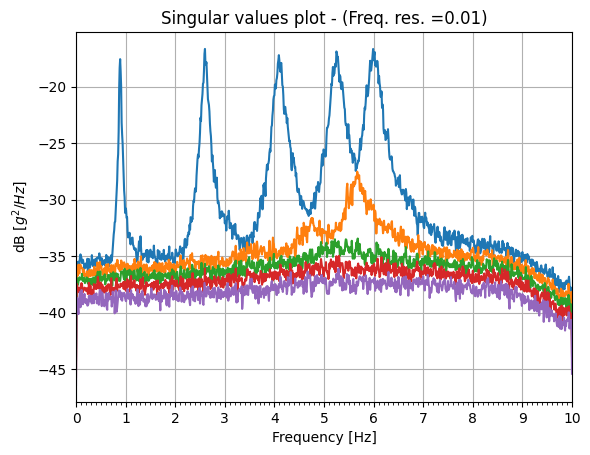

In [7]:
# Run FDD

FDD = oma.FDDsvp(data,  fs)

In [8]:

# Define list/array with the peaks identified from the plot

FreQ = [0.89, 2.6, 4.1, 5.27, 6] # identified peaks


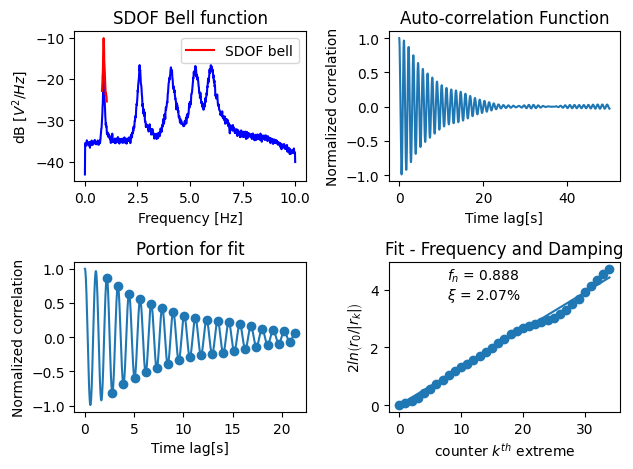

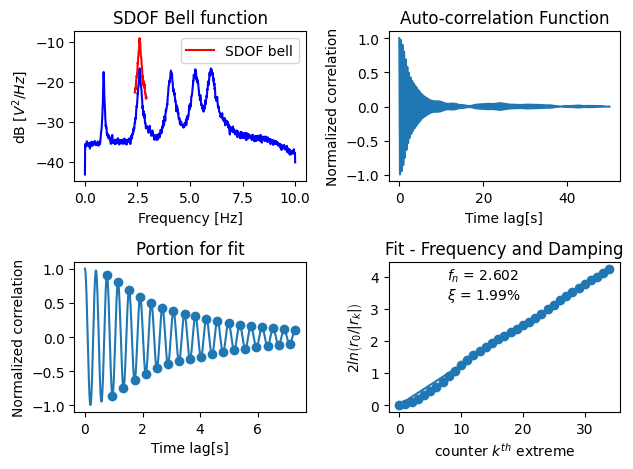

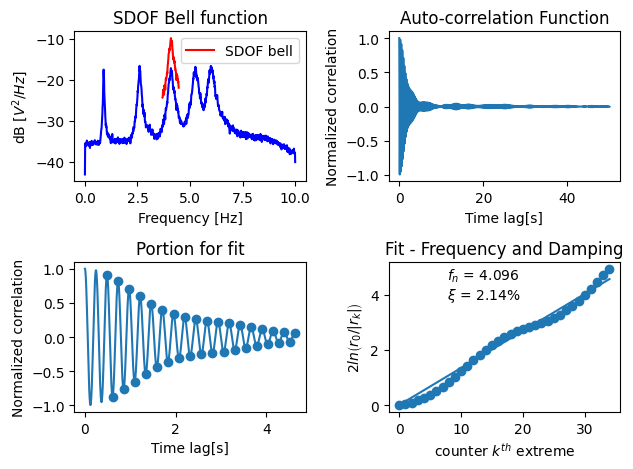

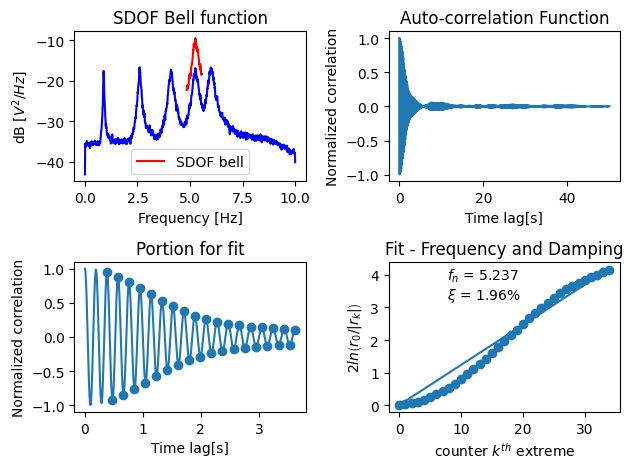

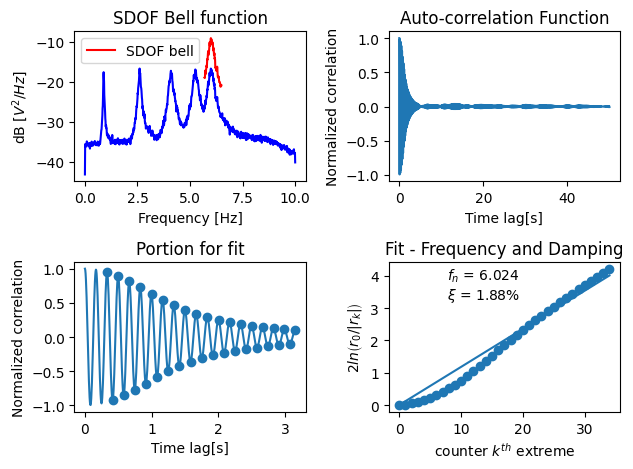

In [9]:

# Extract the modal properties 
Res_FDD = oma.FDDmodEX(FreQ, FDD[1]) # extracting modal properties using standard FDD
Res_EFDD = oma.EFDDmodEX(FreQ, FDD[1], method='EFDD') # " " " " Enhanced-FDD
Res_FSDD = oma.EFDDmodEX(FreQ, FDD[1], method='FSDD', npmax = 35, MAClim=0.95, plot=True) # " " " " FSDD with additional input parameters


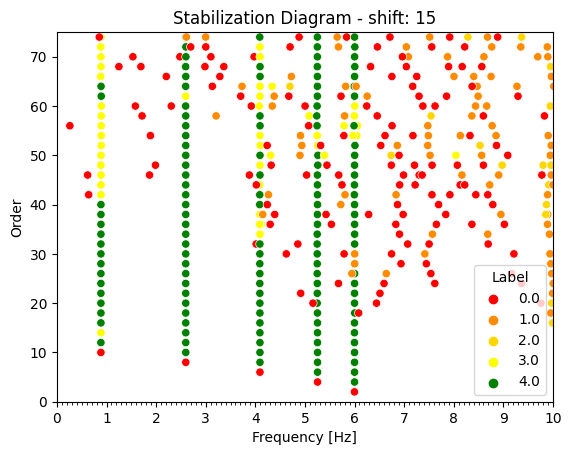

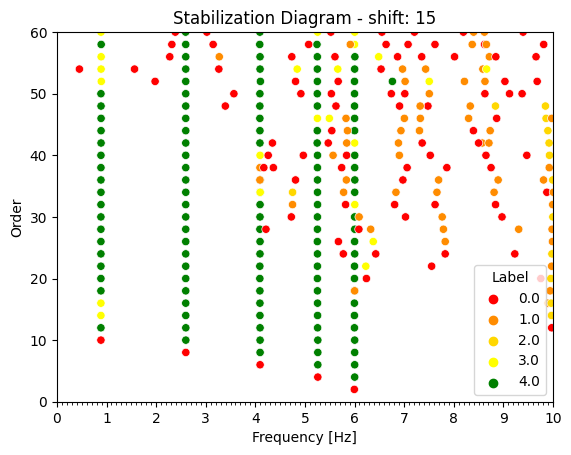

In [5]:
# Run SSI
br = 15
SSIcov= oma.SSIcovStaDiag(data, fs, br) # running SSI-cov
SSIdat = oma.SSIdatStaDiag(data, fs, br, ordmax=60, lim=(0.01, 0.05, 0.02, 0.1)) # running SSI-dat with additional input parameters

In [12]:
# Extract the modal properties
Res_SSIcov = oma.SSIModEX(FreQ, SSIcov[1]) # extracting modal properties
Res_SSIdat= oma.SSIModEX(FreQ, SSIdat[1]) # extracting modal properties

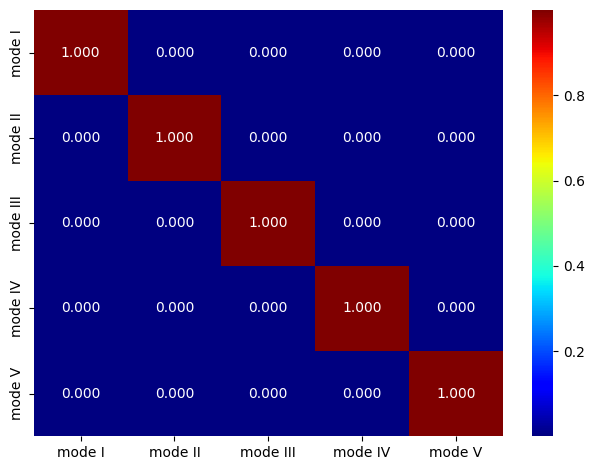

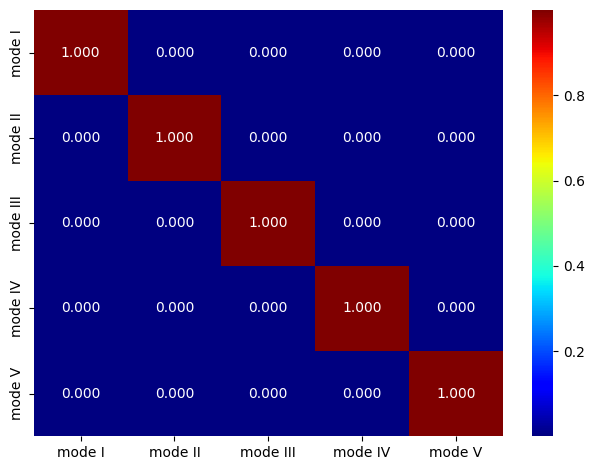

In [15]:

# =============================================================================
# Make some plots
# =============================================================================
MS_FDD = Res_FDD['Mode Shapes'].real
MS_EFDD = Res_EFDD['Mode Shapes'].real
MS_FSDD = Res_FSDD['Mode Shapes'].real
MS_SSIcov = Res_SSIcov['Mode Shapes'].real
MS_SSIdat = Res_SSIdat['Mode Shapes'].real
_nch = data.shape[1]

MAC = np.reshape(
        [oma.MaC(FI_ex[:,l], MS_FSDD[:,k]).real for k in range(_nch) for l in range(_nch)], # (_nch*_nch) list of MAC values 
        (_nch, _nch)) # new (real) shape (_nch x _nch) of the MAC matrix

crossMAC = np.reshape(
        [oma.MaC(MS_SSIcov[:,l], MS_SSIdat[:,k]).real for k in range(_nch) for l in range(_nch)], # (_nch*_nch) list of MAC values 
        (_nch,_nch)) # new (real) shape (_nch x _nch) of the MAC matrix

col = ["mode I", "mode II", "mode III", "mode IV", "mode V"]

MAC = pd.DataFrame(MAC, columns=col, index=col)
crossMAC = pd.DataFrame(crossMAC, columns=col, index=col)

fig, ax = plt.subplots()
sns.heatmap(MAC,cmap="jet",ax=ax,annot=True, fmt='.3f',)
fig.tight_layout()
plt.show()

fig, ax1 = plt.subplots()
sns.heatmap(crossMAC,cmap="jet", ax=ax1, annot=True, fmt='.3f',)
fig.tight_layout()
plt.show()